In [1]:
# Hyperparameter Tuning Analysis
# Batch size, Temperature parameter of LARS optimizer and Learning rate was varied.
# Batch sizes = 64, 128, 256
# Learning Rate (LR) = 1, 2, 3, 4, 6, 8, 10
# Temparature parameter = 0.05, 0.07, 0.09
# The loss was recorded for 1000 iterations during training

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter  # For Savitzky-Golay smoothing

In [28]:
npy_folder = "./Results/NumpyArrs"
x_label="Iterations"
y_label="Loss"
title="SimCLR Loss"
# Smoothing params
window_length=30
polyorder=2

# plt_name = "SimCLR_Loss_BatchSize.png"
# plt_name = "SimCLR_Loss_LR.png"
plt_name = "SimCLR_Loss_Temp.png"

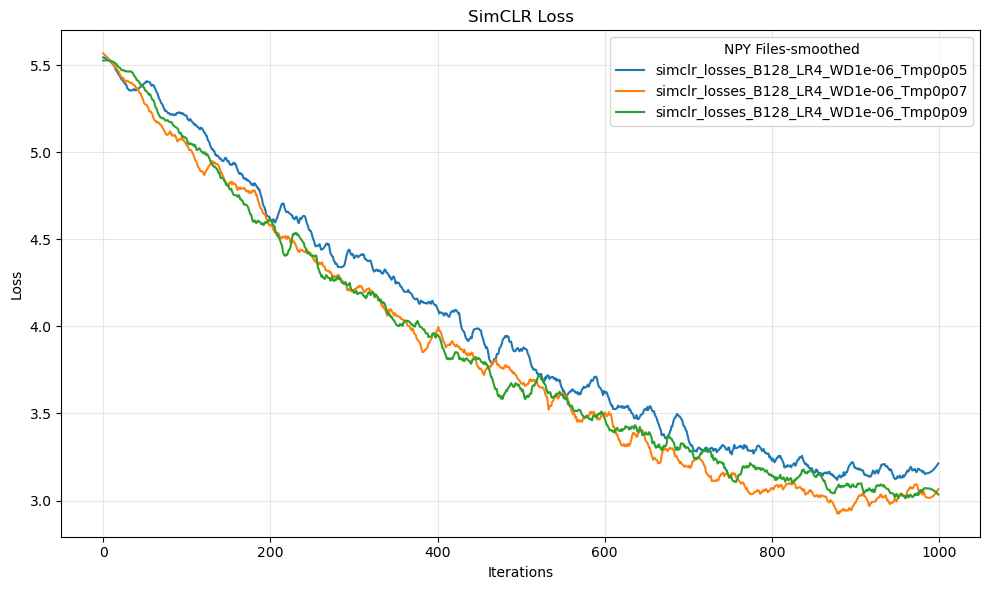

In [29]:
"""
    Plots data from multiple .npy files in a folder on a single plot.

    Args:
        npy_folder (str): Path to the folder containing the .npy files.
        x_label (str, optional): Label for the x-axis. Defaults to "Iterations".
        y_label (str, optional): Label for the y-axis. Defaults to "Loss".
        title (str, optional): Title for the plot. Defaults to "SimCLR Loss".
"""
plt.figure(figsize=(10, 6))
for filename in os.listdir(npy_folder):
    if filename.endswith(".npy"):
        filepath = os.path.join(npy_folder, filename)
        try:
            data = np.load(filepath)
            # print("loaded")
            # If your x-axis is just the index of the data
            x_values = np.arange(len(data))  # Create x-values based on array length
            
            # Apply Savitzky-Golay smoothing
            if len(data) < window_length:  # Handle cases where data is shorter than window
                print(f"Warning: {filename} data is shorter than window length. Skipping smoothing.")
                smoothed_data = data  # Don't smooth, just use the raw data
            else:
                try:
                    smoothed_data = savgol_filter(data, window_length, polyorder)
                except ValueError as e:
                    print(f"Error smoothing {filename}: {e}. Check window_length and polyorder.")
                    smoothed_data = data # use raw data
            
            # plt.plot(x_values, data, label=filename[:-4])  # Use filename (without .npy) as label              
            plt.plot(x_values, smoothed_data, label=filename[:-4])

        except Exception as e:
            print(f"Error loading or plotting {filename}: {e}")

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.legend(title="NPY Files-smoothed")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(plt_name)
plt.show()
